# Week 6
# Introduction to Python Plotting Tools

Making informative visualizations of data is one of the most important tasks in data analysis.
- Learn the distribution of data
- Explore trends and patterns in data
- Identify outliers
- Generate ideas for modeling
- Present your findings

Today, we will study how to create several most frequently-used types of plots in Python.
- Scatter plots
- Bar plots
- Histograms
- Pie plots
- Box plots

Readings:
- Textbook Chapter 8

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Scatter Plots
A **scatter plot** uses dots to represent values for two numerical variables. The position of each dot represents an instance of data. Scatter plots are helpful for identifying relationships between variables.

In [12]:
# A simple example of scatter plots
# Source: https://www.who.int/growthref/hfa_boys_5_19years_z.pdf?ua=1
heights_boys = pd.DataFrame({'Age': range(5, 20),
                   'Height': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5]})
heights_boys

,Age,Height
0,5,110.0
1,6,116.0
2,7,122.0
3,8,127.0
4,9,133.0
5,10,137.0
6,11,143.0
7,12,149.0
8,13,156.0
9,14,163.0


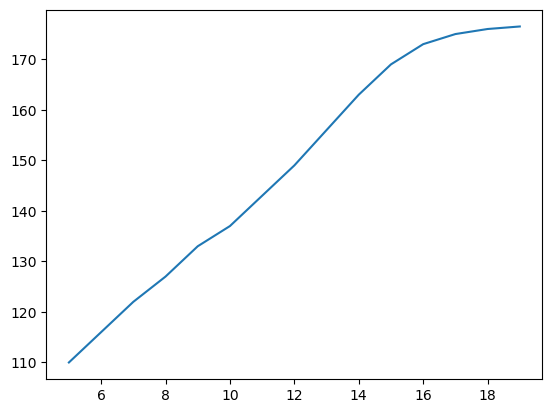

In [13]:
# Plot Age vs. Heights
plt.plot(heights_boys['Age'], heights_boys['Height'])

Text(0, 0.5, 'Height (cm)')

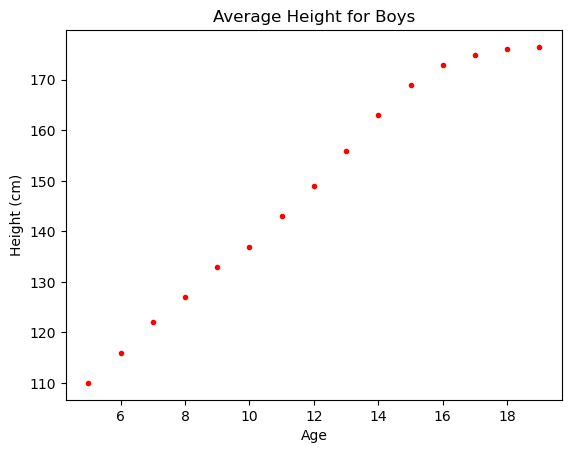

In [14]:
# Add descriptions to the figure
plt.plot(heights_boys['Age'], heights_boys['Height'], 'r.') 
# r means red color, . means using a dot for each point
plt.title("Average Height for Boys")
plt.xlabel("Age")
plt.ylabel("Height (cm)")

In [15]:
# Multiple sequences of data
heights = pd.DataFrame({'Age': range(5, 20),
                        'BoyHeight': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5],
                        'GirlHeight': [109.6, 115, 121, 126.5, 132.5, 139, 145, 151, 156, 160, 161.7, 162.5, 162.8, 163, 163.2]})
heights

,Age,BoyHeight,GirlHeight
0,5,110.0,109.6
1,6,116.0,115.0
2,7,122.0,121.0
3,8,127.0,126.5
4,9,133.0,132.5
5,10,137.0,139.0
6,11,143.0,145.0
7,12,149.0,151.0
8,13,156.0,156.0
9,14,163.0,160.0


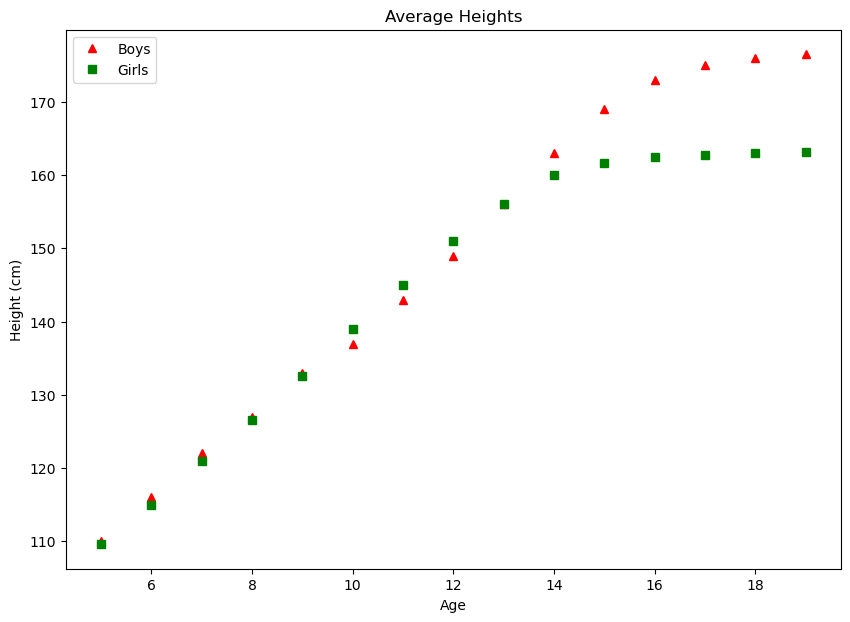

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(heights['Age'], heights['BoyHeight'], 'r^', label="Boys")
plt.plot(heights['Age'], heights['GirlHeight'], 'gs', label='Girls')
plt.title("Average Heights")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.legend()

**Q: What can we see from this plot?**
- Range?
- Trend?
- Comparison?

## Bar Plots

Bar plots are useful for presenting labeled data.

In [17]:
df = pd.DataFrame([[67, 76],
                   [78, 87],
                   [89, 98],
                   [90, 95]],
                  index=['Alice', 'Bob', 'Clare', 'David'],
                  columns=['Midterm', 'Final'])
df

,Midterm,Final
Alice,67,76
Bob,78,87
Clare,89,98
David,90,95


<AxesSubplot:>

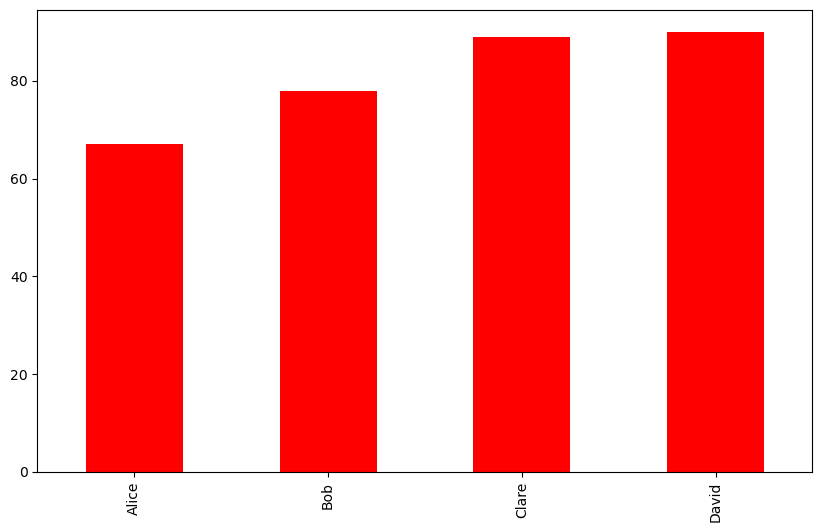

In [18]:
df['Midterm'].plot.bar(color='r', figsize=(10, 6))

<AxesSubplot:>

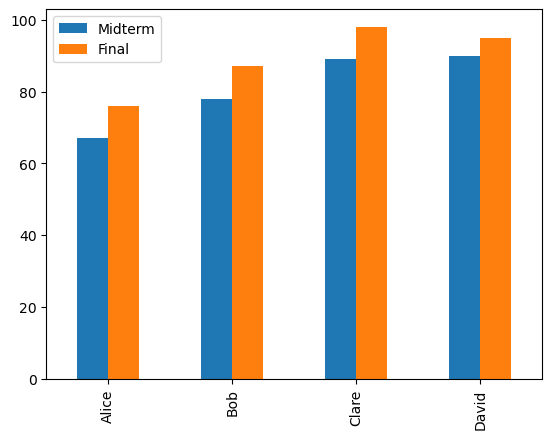

In [19]:
df[['Midterm', 'Final']].plot.bar()

In [20]:
# df['Midterm', 'Final'].plot.bar() # MISTAKE: forget to put column names in a list

<AxesSubplot:>

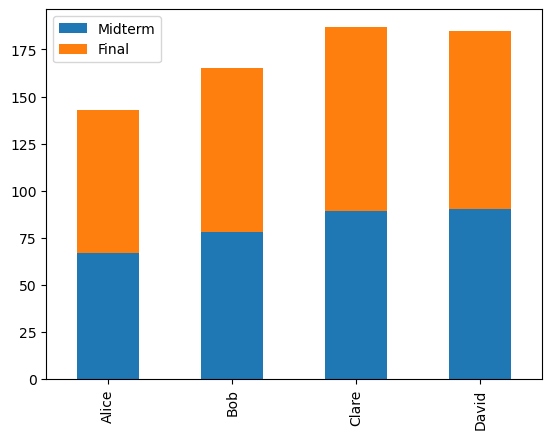

In [21]:
df[['Midterm', 'Final']].plot.bar(stacked=True)

<AxesSubplot:>

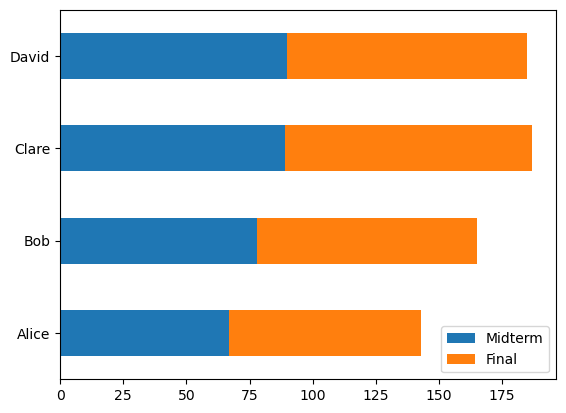

In [22]:
df[['Midterm', 'Final']].plot.barh(stacked=True)

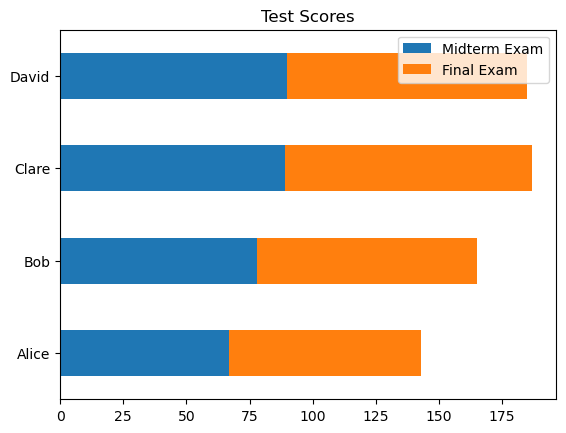

In [23]:
# We can use plt functions to modify the plot

df[['Midterm', 'Final']].plot.barh(stacked=True)
plt.title("Test Scores")
plt.legend(["Midterm Exam", "Final Exam"], loc="upper right")

In [24]:
df.to_dict(orient='list')

{'Midterm': [67, 78, 89, 90], 'Final': [76, 87, 98, 95]}

<BarContainer object of 4 artists>

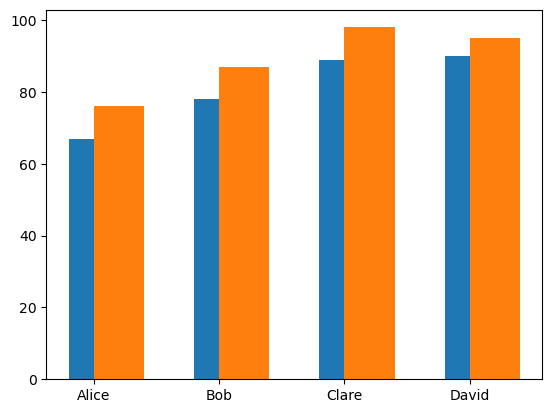

In [25]:
# We can also use plt.bar() to create the bar plot
plt.bar(df.index, df['Midterm'], width=0.4, label='Midterm',
       align='center')
plt.bar(df.index, df['Final'], width=0.4, label='Final',
       align='edge')


## Histograms
**Histograms** are useful for showing the distribution of a variable
- Each bar cover a range of values.
- The height of each bar represents the number of data in the corresponding range.
- Boundary values are counted towards the left bar by convention.

In [26]:
# Generate 100 values using np.random.rand()
df = pd.DataFrame(np.random.rand(10000), columns=['Rand'])
df

,Rand
0,0.482661
1,0.633265
2,0.586429
3,0.643542
4,0.935403
...,...
9995,0.590343
9996,0.029088
9997,0.093606
9998,0.124394


<AxesSubplot:ylabel='Frequency'>

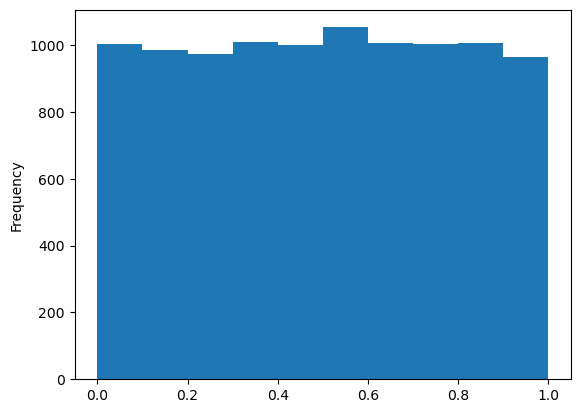

In [27]:
df['Rand'].plot.hist() # Uniform distribution
# df['Rand'].hist()

In [28]:
# Add a column 'Randn' with values generated by np.random.randn()
df['Randn'] = np.random.randn(10000)
df

,Rand,Randn
0,0.482661,-1.107031
1,0.633265,0.739502
2,0.586429,-0.842064
3,0.643542,-1.237603
4,0.935403,-2.027182
...,...,...
9995,0.590343,0.175905
9996,0.029088,2.349716
9997,0.093606,-0.445559
9998,0.124394,0.964483


<AxesSubplot:ylabel='Frequency'>

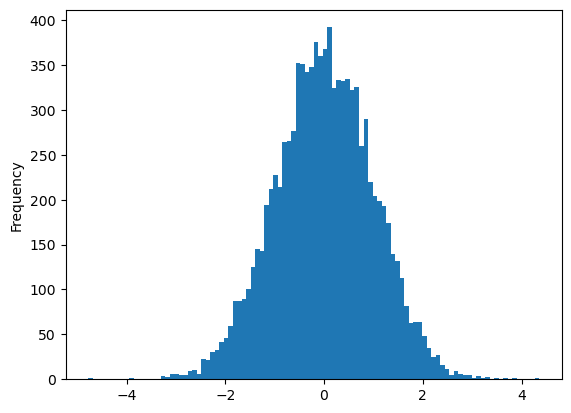

In [29]:
# df['Randn'].hist()
df['Randn'].plot.hist(bins=100) # Normal distribution (Gaussian distribution)

<AxesSubplot:ylabel='Frequency'>

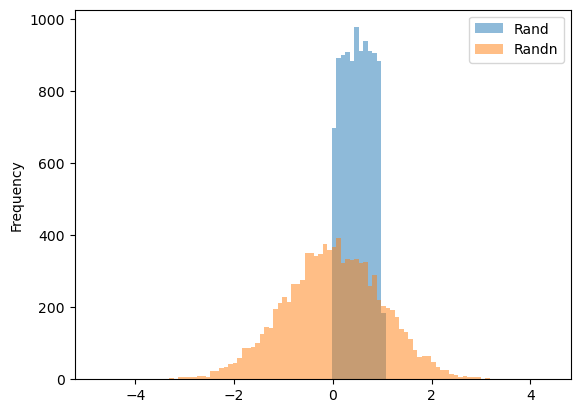

In [30]:
df[['Rand', 'Randn']].plot.hist(alpha=0.5, bins=100)

## Pie Plots

**Pie Plots** are useful for showing the proportion of values.

In [31]:
df = pd.DataFrame([5, 10, 20, 7, 3],
                  index=['A', 'B', 'C', 'D', 'F'],
                  columns=['Students'])
df

,Students
A,5
B,10
C,20
D,7
F,3


Text(0.5, 1.0, 'Grade Distribution')

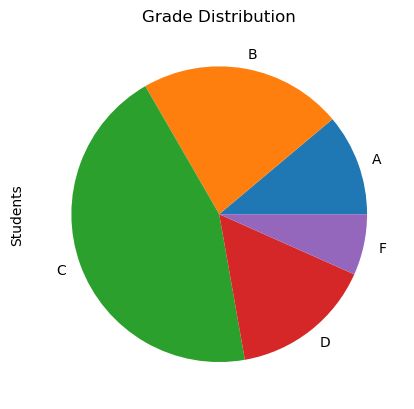

In [32]:
# df['Students'].plot.pie(autopct='%.2f', figsize=(6, 6))
df['Students'].plot.pie()
plt.title("Grade Distribution")

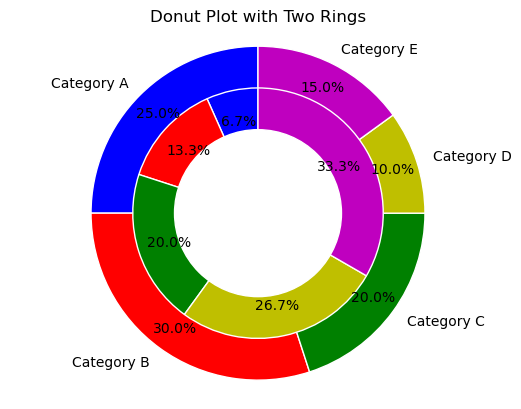

In [33]:
# We can create a more informational plot with some extra effort.

# Sample data
data1 = [25, 30, 20, 10, 15]
data2 = [10, 20, 30, 40, 50]
labels = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for the rings
colors = ['b', 'r', 'g', 'y', 'm']

# Create the first ring (outer ring)
wedges1= ax.pie(data1, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
for wedge in wedges1[0]:
    wedge.set(edgecolor='white', linewidth=1)

# Create the second ring (inner ring)
wedges2= ax.pie(data2, autopct='%1.1f%%', startangle=90, radius=0.75, pctdistance=0.75, colors=colors)
for wedge in wedges2[0]:
    wedge.set(edgecolor='white', linewidth=1)

# Add a circle at the center to create the donut hole
center_circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(center_circle)

# Add a title
plt.title('Donut Plot with Two Rings')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Box Plots

**Box plots** are used for depicting groups of numerical data through their quartiles

- Upper edge: 75% quartile (75% of data are below this value)
- Lower edge: 25% quartile (25% of data are below this value)
- Middle line: median value (50% of data are below this value)
- Upper bar: upper *interquartile range* (values above this bar are considered outliers)
- Lower bar: lower *interquartile range* (values below this bar are considered outliers)
- Dots: outliers

In [34]:
# Import the iris dataset
from sklearn import datasets
iris_raw = datasets.load_iris()
iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<img src="https://gadictos.com/wp-content/uploads/2019/03/iris-machinelearning-1060x397.png">

In [35]:
# Turn the data into a data frame
iris_df = pd.DataFrame(data=iris_raw['data'],
                       columns=iris_raw['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

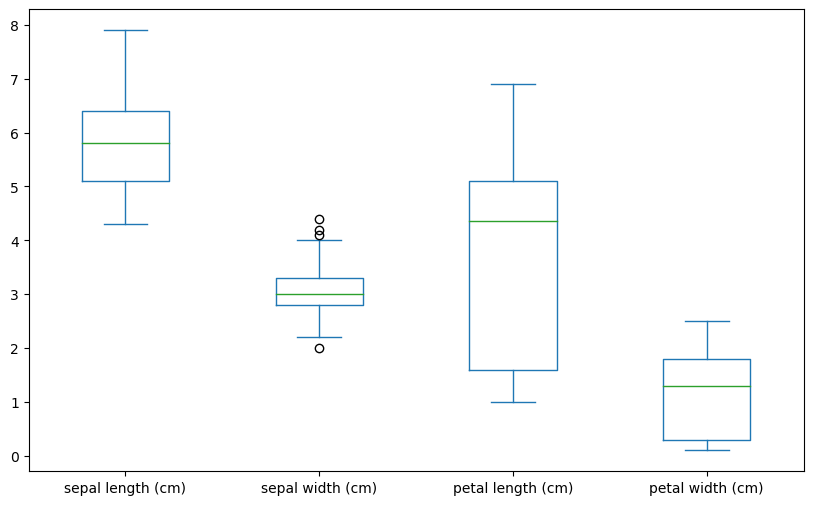

In [36]:
iris_df.plot.box(figsize=(10, 6))

<AxesSubplot:>

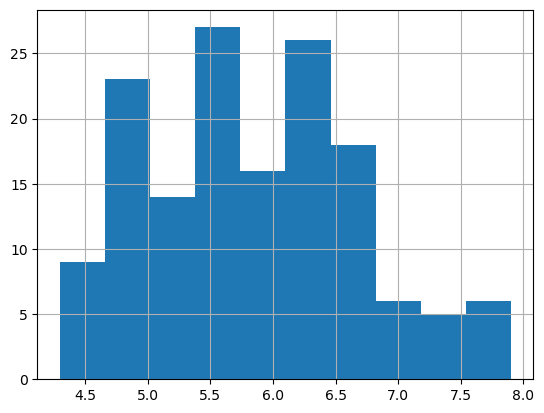

In [37]:
# We may also use histograms to examine the data
iris_df['sepal length (cm)'].hist()

In [38]:
# There are too many data for bar plot or pie plot
# iris_df['sepal length (cm)'].plot.bar()

# iris_df['sepal length (cm)'].plot.pie()

In [39]:
# Add target labels
iris_df['Target'] = iris_raw['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
iris_raw['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**1. What is the distribution of sepal length for each type of iris?**

<AxesSubplot:>

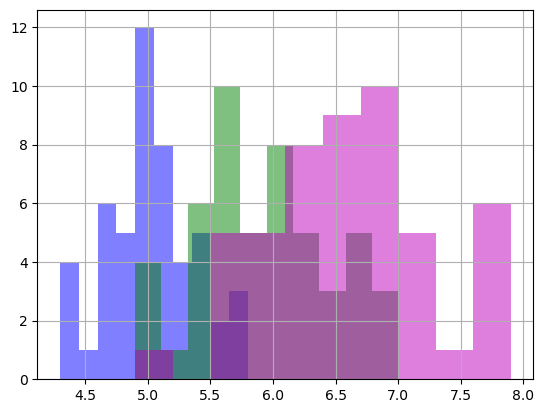

In [41]:
# Box plot or histogram are good options.
iris_df[iris_df['Target'] == 0]['sepal length (cm)'].hist(alpha=0.5,
                                                         color='b')
iris_df[iris_df['Target'] == 1]['sepal length (cm)'].hist(alpha=0.5,
                                                         color='g')
iris_df[iris_df['Target'] == 2]['sepal length (cm)'].hist(alpha=0.5,
                                                         color='m')

**Observation:** 
1. The distribution of three iris types are different.
2. Setosa tends to have short sepals.
3. Virginica tends to have long sepals.
4. If the sepal length is in the middle range (5 - 7cm), it can be setosa, virginica, or versicolor, but it is more likely to be versicolor than the other two.

In [42]:
# Create box plots
# We need to create a new data frame with each group of values in a
# separate column
setosa_ary = \
    iris_df[iris_df['Target'] == 0][['sepal length (cm)']].values
versicolor_ary = \
    iris_df[iris_df['Target'] == 1][['sepal length (cm)']].values
virginica_ary = \
    iris_df[iris_df['Target'] == 2][['sepal length (cm)']].values
boxplot_data = pd.DataFrame(setosa_ary, columns=['Setosa'])
boxplot_data['Versicolor'] = versicolor_ary
boxplot_data['Virginicia'] = virginica_ary
boxplot_data.head()

,Setosa,Versicolor,Virginicia
0,5.1,7.0,6.3
1,4.9,6.4,5.8
2,4.7,6.9,7.1
3,4.6,5.5,6.3
4,5.0,6.5,6.5


<AxesSubplot:>

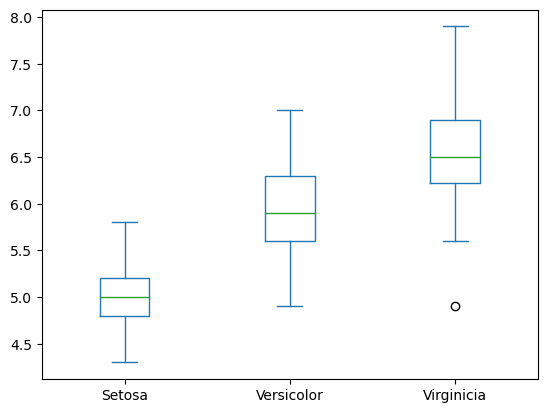

In [43]:
boxplot_data.plot.box()

The boxplot confirm our obeservations made before. In addition, it shows that there is a Virginica instance with very short sepals.

**2. What is the distribution of petal length for each type of iris?**

In [44]:
def show_histogram(feature):
    
    # Draw a histogram of the feature for each subgroup.
    iris_df[iris_df['Target'] == 0][feature].hist(alpha=0.5, color='b')
    iris_df[iris_df['Target'] == 1][feature].hist(alpha=0.5, color='g')
    iris_df[iris_df['Target'] == 2][feature].hist(alpha=0.5, color='m')

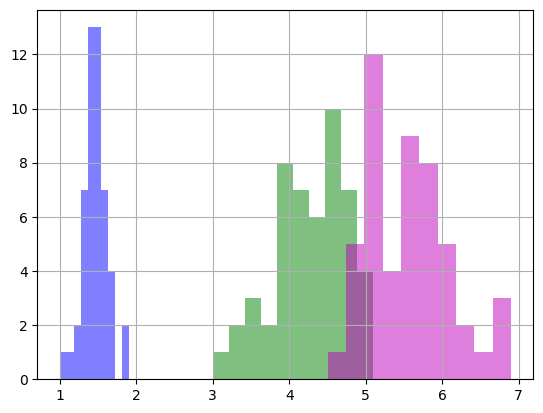

In [45]:
show_histogram(iris_df.columns[2])

**Observations:**
1. Three distributions are clearly different.
2. For length < 2cm, the flower is most likely Setosa.
3. For length > 6cm, the flower is most likely Virginica.
4. There is a little overlap between Virginica and Versicolor.

In [46]:
# Using the function, we can easily show the distribution for each feature.

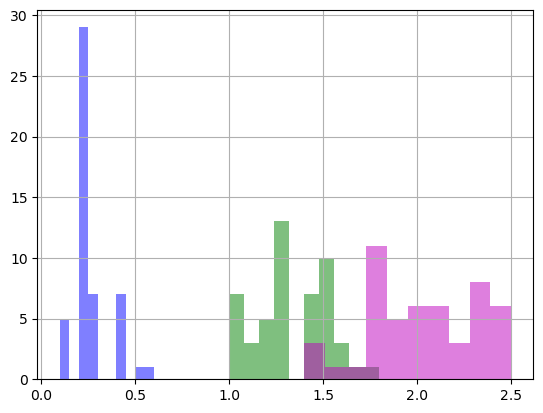

In [47]:
show_histogram(iris_df.columns[3])

**3. What is the distribution of sepal length and width for each type of iris?**

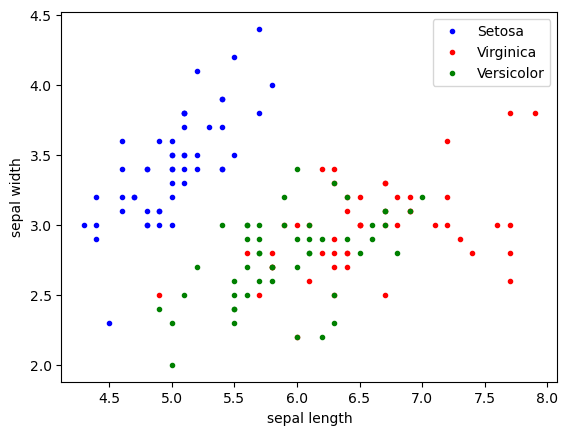

In [48]:
# Create three separate data frames
setosa = iris_df[iris_df['Target'] == 0]
versicolor = iris_df[iris_df['Target'] == 1]
virginica = iris_df[iris_df['Target'] == 2]

plt.plot(setosa['sepal length (cm)'], 
         setosa['sepal width (cm)'],
         "b.", label="Setosa")



plt.plot(virginica['sepal length (cm)'], 
         virginica['sepal width (cm)'],
         "r.", label="Virginica")

plt.plot(versicolor['sepal length (cm)'], 
         versicolor['sepal width (cm)'],
         "g.", label="Versicolor")

plt.xlabel('sepal length')
plt.ylabel('sepal width')
# plt.legend(["Setosa", "Versicolor", "Virginica"]) # Prone to mistake
plt.legend()

**4. What is the distribution of petal length and width for each type of iris?**

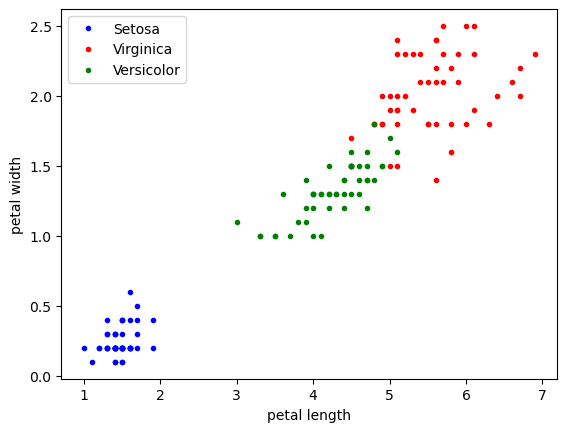

In [50]:
plt.plot(setosa['petal length (cm)'], 
         setosa['petal width (cm)'],
         "b.", label="Setosa")

plt.plot(virginica['petal length (cm)'], 
         virginica['petal width (cm)'],
         "r.", label="Virginica")

plt.plot(versicolor['petal length (cm)'], 
         versicolor['petal width (cm)'],
         "g.", label="Versicolor")

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

**Observation**:


**5. Based on the above observations, can you come up with a simple rule for classification?**

Rules:

1. If petal length < 2.5cm and petal width < 1cm, then the flower is Setosa.
2. Else if petal length < 5.2cm and petal width < 1.7cm, then the flower is Versicolor.
3. Otherwise, then the flower is Virginica.


**6. Can you show the accuracy of your classification rules on each type of iris?**

In [51]:
def predict(row):
    
    if row['petal length (cm)'] < 2.5 and row['petal width (cm)'] < 1:
        return "Setosa"
    elif row['petal length (cm)'] < 5.2 and row['petal width (cm)'] < 1.7:
        return "Versicolor"
    else:
        return "Virginica"

In [55]:
iris_df['Prediction'] = iris_df.apply(predict, axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Prediction
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [56]:
def detect_error(row):
    """
    Return 1 if the prediction is correct.
    Return 0 if the prediction is wrong.
    """
    
    if row['Target'] == 0 and row['Prediction'] == "Setosa":
        return 1
    elif row['Target'] == 1 and row['Prediction'] == "Versicolor":
        return 1
    elif row['Target'] == 2 and row['Prediction'] == "Virginica":
        return 1
    else:
        return 0

In [57]:
iris_df['Correct?'] = iris_df.apply(detect_error, axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Prediction,Correct?
0,5.1,3.5,1.4,0.2,0,Setosa,1
1,4.9,3.0,1.4,0.2,0,Setosa,1
2,4.7,3.2,1.3,0.2,0,Setosa,1
3,4.6,3.1,1.5,0.2,0,Setosa,1
4,5.0,3.6,1.4,0.2,0,Setosa,1


In [59]:
# Total number of correct predictions
accuracy = iris_df['Correct?'].sum() / iris_df.shape[0]
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334
